In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Verisetini dosyadan okuma

In [4]:
df = pd.read_csv("data/polandCars/Car_sale_ads.csv", low_memory = False)

### 1. Verisetinin İncelenmesi

* Bu aşama iyi bir model oluşturabilmek açısından oldukça önemlidir.
* Veriyi doğru okumadan iyi bir model elde etmek mümkün değildir.

#### 1.1. Veri Hakkında Genel Bilgi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

#### 1.2. Boş Elemana Sahip Sütunlar

In [6]:
df.isna().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

#### 1.3. Örnek Veriler

In [7]:
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [8]:
df.head().T

,0,1,2,3,4
Index,0,1,2,3,4
Price,86200,43500,44900,39900,97900
Currency,PLN,PLN,PLN,PLN,PLN
Condition,New,Used,Used,Used,New
Vehicle_brand,Abarth,Abarth,Abarth,Abarth,Abarth
Vehicle_model,595,Other,500,500,595
Vehicle_version,NaN,NaN,NaN,NaN,NaN
Vehicle_generation,NaN,NaN,NaN,NaN,NaN
Production_year,2021,1974,2018,2012,2021
Mileage_km,1.0,59000.0,52000.0,29000.0,600.0


In [13]:
# Toplam Eleman sayısı
len(df)

208304

#### 1.4 İlişkili Olduğunu Düşündüğünüz Sütunlar Arası Bağlantıya Bakma

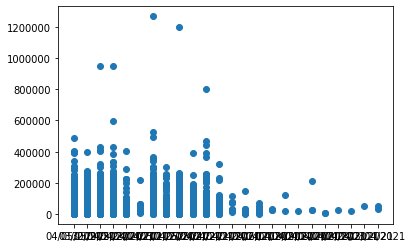

In [15]:
# Teklif tarihi ve fiyatın ikili ilişkisini gösteren grafik
fig, ax = plt.subplots()
ax.scatter(df["Offer_publication_date"][:5000], df["Price"][:5000])

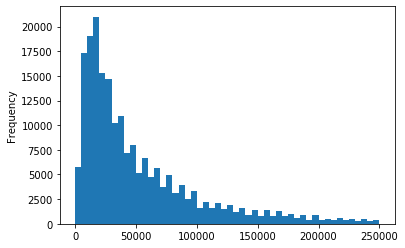

In [27]:
# Fiyatlara ait dağılımı gösteren histogram
df.Price.plot.hist(range=[0, 250000], bins=50)

#### 1.5 Veri Ön İşleme

In [28]:
df.Offer_publication_date.dtype

dtype('O')

In [33]:
df.Offer_publication_date[:5]

0   2021-04-05
1   2021-03-05
2   2021-03-05
3   2021-04-30
4   2021-04-30
Name: Offer_publication_date, dtype: datetime64[ns]

In [30]:
df = pd.read_csv("data/polandCars/Car_sale_ads.csv", low_memory = False, parse_dates=['Offer_publication_date'])

In [31]:
df.Offer_publication_date.dtype

dtype('<M8[ns]')

In [32]:
df.Offer_publication_date[:5]

0   2021-04-05
1   2021-03-05
2   2021-03-05
3   2021-04-30
4   2021-04-30
Name: Offer_publication_date, dtype: datetime64[ns]

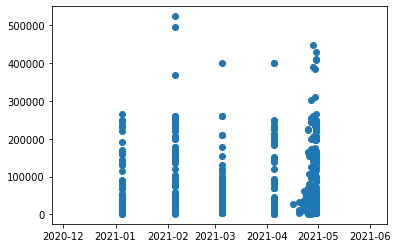

In [35]:
# Teklif tarihi ve fiyatın ikili ilişkisini gösteren grafik
fig, ax = plt.subplots()
ax.scatter(df["Offer_publication_date"][:1000], df["Price"][:1000])

##### Gereksiz sütunlar temizlenebilir.
Aşağıdaki sütunlar verisetinin büyük bir bölümünde veri eksikliğine sahip olduğundan bu sütunları verisetinden çıkarabiliriz.

- Vehicle_version             70222
- Vehicle_generation          60444
- CO2_emissions              114257
- Origin_country              89992
- First_owner                143210
- First_registration_date    121859

In [37]:
df.drop("Vehicle_version", axis=1, inplace=True)
df.drop("Vehicle_generation", axis=1, inplace=True)
df.drop("CO2_emissions", axis=1, inplace=True)
df.drop("Origin_country", axis=1, inplace=True)
df.drop("First_owner", axis=1, inplace=True)
df.drop("First_registration_date", axis=1, inplace=True)

In [97]:
# Index sütunu ile işimiz olmadığından onu da silebiliriz.
df.drop("Index", axis=1, inplace=True)

In [38]:
df.head().T

,0,1,2,3,4
Index,0,1,2,3,4
Price,86200,43500,44900,39900,97900
Currency,PLN,PLN,PLN,PLN,PLN
Condition,New,Used,Used,Used,New
Vehicle_brand,Abarth,Abarth,Abarth,Abarth,Abarth
Vehicle_model,595,Other,500,500,595
Production_year,2021,1974,2018,2012,2021
Mileage_km,1.0,59000.0,52000.0,29000.0,600.0
Power_HP,145.0,75.0,180.0,160.0,165.0
Displacement_cm3,1400.0,1100.0,1368.0,1368.0,1368.0


In [39]:
# Currency -> para birimi sütununda PLN harici bir veri varmı diye bakalım
df['Currency'].value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

In [45]:
# Euro olan veriler çok az olduğu için bu verileri verisetimizden çıkarabiliriz.
# Farklı para birimleri fazla sayıda bulunsaydı bunları o gün, yada ay için olan ortalama kur
# kullanılarak tek bir para birimine çevirme yoluna da gidebilirdik.
df = df[df['Currency'] != 'EUR']

In [46]:
# Şimdi tüm para birimlerimiz PLN türünde dolayısıyla Currency sütununu da kaldırabiliriz.
df['Currency'].value_counts()

PLN    208034
Name: Currency, dtype: int64

In [47]:
df.drop("Currency", axis=1, inplace=True)

#### Features classındaki Listeler ayrılabilir

In [71]:
df['Features'].head()

0                                                   []
1                                                   []
2    ['ABS', 'Electric front windows', 'Drivers air...
3    ['ABS', 'Electric front windows', 'Drivers air...
4    ['ABS', 'Electrically adjustable mirrors', 'Pa...
Name: Features, dtype: object

In [82]:
import ast
# Features sütununu stringten listeye çevirelim
df['Features'] = [ast.literal_eval(l) for l in df['Features']]

In [84]:
# Listeye dönüşmüş oldu
df['Features'].head()

0                                                   []
1                                                   []
2    [ABS, Electric front windows, Drivers airbag, ...
3    [ABS, Electric front windows, Drivers airbag, ...
4    [ABS, Electrically adjustable mirrors, Passeng...
Name: Features, dtype: object

In [69]:
features = {}
for l in df['Features']:
    l = ast.literal_eval(l)
    for i in l:
        if i in features:
            features[i] += 1
        else:
            features[i] = 1

In [73]:
features

{'ABS': 186256,
 'Electric front windows': 181366,
 'Drivers airbag': 180545,
 'Power steering': 180367,
 'ASR (traction control)': 138220,
 'Rear view camera': 52946,
 'Heated side mirrors': 119833,
 'CD': 138426,
 'Electrically adjustable mirrors': 173270,
 'Passengers airbag': 178672,
 'Alarm': 106642,
 'Bluetooth': 116486,
 'Automatic air conditioning': 134191,
 'Airbag protecting the knees': 52382,
 'Central locking': 185129,
 'Immobilizer': 168606,
 'Factory radio': 169453,
 'Alloy wheels': 143815,
 'Rain sensor': 108175,
 'On-board computer': 154387,
 'Multifunction steering wheel': 138016,
 'AUX socket': 99136,
 'Xenon lights': 37538,
 'USB socket': 102310,
 'MP3': 96108,
 'ESP(stabilization of the track)': 143952,
 'Front side airbags': 129954,
 'Rear parking sensors': 117773,
 'Isofix': 133467,
 'Air curtains': 117994,
 'Tinted windows': 81519,
 'Daytime running lights': 105275,
 'Rear side airbags': 68498,
 'Fog lights': 127098,
 'Twilight sensor': 102507,
 'GPS navigation':

In [86]:
len(features)

70

In [83]:
for k in features:
    df[k] = [1 if k in l else 0 for l in df['Features'] ]

In [85]:
df.head().T

,0,1,2,3,4
Index,0,1,2,3,4
Price,86200,43500,44900,39900,97900
Condition,New,Used,Used,Used,New
Vehicle_brand,Abarth,Abarth,Abarth,Abarth,Abarth
Vehicle_model,595,Other,500,500,595
...,...,...,...,...,...
Roof rails,0,0,0,0,0
Active cruise control,0,0,0,0,0
Hook,0,0,0,0,0
Lane assistant,0,0,0,0,0


In [87]:
# Features sütununu artık silebiliriz.
df.drop("Features", axis=1, inplace=True)

### Kopya almak

* Verinin bu halini kaybetmemek için bir kopya alabilir ve onun üzerinde çalışabiliriz.

In [88]:
df_tmp = df.copy()

In [89]:
# Bir makine öğrenmesi modelini kullanmayı deneyelim
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop("Price", axis=1), df_tmp["Price"])

ValueError: could not convert string to float: 'New'

In [90]:
df_tmp.isna().sum()

Index                    0
Price                    0
Condition                0
Vehicle_brand            0
Vehicle_model            0
                        ..
Roof rails               0
Active cruise control    0
Hook                     0
Lane assistant           0
HUD(head-up display)     0
Length: 87, dtype: int64

In [91]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208034 entries, 0 to 208303
Data columns (total 87 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Index                            208034 non-null  int64         
 1   Price                            208034 non-null  int64         
 2   Condition                        208034 non-null  object        
 3   Vehicle_brand                    208034 non-null  object        
 4   Vehicle_model                    208034 non-null  object        
 5   Production_year                  208034 non-null  int64         
 6   Mileage_km                       207051 non-null  float64       
 7   Power_HP                         207394 non-null  float64       
 8   Displacement_cm3                 206082 non-null  float64       
 9   Fuel_type                        208034 non-null  object        
 10  Drive                            193049 non-

### String içeren sütunları kategorik veriye çevirme


In [92]:
# String içeren sütunları bulmak için
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Condition
Vehicle_brand
Vehicle_model
Fuel_type
Drive
Transmission
Type
Colour
Offer_location


In [93]:
# Tüm string verileri kategorik veriye çevirmek için
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [94]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208034 entries, 0 to 208303
Data columns (total 87 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Index                            208034 non-null  int64         
 1   Price                            208034 non-null  int64         
 2   Condition                        208034 non-null  category      
 3   Vehicle_brand                    208034 non-null  category      
 4   Vehicle_model                    208034 non-null  category      
 5   Production_year                  208034 non-null  int64         
 6   Mileage_km                       207051 non-null  float64       
 7   Power_HP                         207394 non-null  float64       
 8   Displacement_cm3                 206082 non-null  float64       
 9   Fuel_type                        208034 non-null  category      
 10  Drive                            193049 non-

In [100]:
# Boş sütunlarımız vardı örneğin Power_HP sütununda 640 değer boştu
df_tmp['Power_HP'].isna().sum()

640

## Eksik Verileri Tamamlama
### Nümerik Verilerde Eksik Verileri Tamamlama

In [101]:
# Hangi nümerik sütunlar eksik veriye sahip?
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Mileage_km
Power_HP
Displacement_cm3
Doors_number


In [102]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Bir verinin eksik olup olmadığını saklayan binary bir sütun ekleyelim
            # Bu bizim eklediğimiz sentetik bir veri olduğu için bu bilgiyi kaybetmemek önemli
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Eksik nümerik veriyi median değeri ile dolduralım
            df_tmp[label] = content.fillna(content.median())

In [103]:
# Boş nümerik değer kaldı mı diye kontrol edelim
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### Nümerik Olmayan Verilerde Eksik Verileri Tamamlama

In [105]:
# Nümerik olmayan sütunları kontrol edelim
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Condition
Vehicle_brand
Vehicle_model
Fuel_type
Drive
Transmission
Type
Colour
Offer_publication_date
Offer_location


In [106]:
# Kategorik verileri sayısal verilere dönüştürüp eksik verileri dolduralım
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Bir verinin eksik olup olmadığını saklayan binary bir sütun ekleyelim
        # Bu bizim eklediğimiz sentetik bir veri olduğu için bu bilgiyi kaybetmemek önemli
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Eksik veri -1 olarak geliyor 1 ile toplayarak eksik verileri 0 olarak güncelledik
        df_tmp[label] = pd.Categorical(content).codes+1

In [107]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208034 entries, 0 to 208303
Data columns (total 100 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Price                              208034 non-null  int64  
 1   Condition                          208034 non-null  int8   
 2   Vehicle_brand                      208034 non-null  int8   
 3   Vehicle_model                      208034 non-null  int16  
 4   Production_year                    208034 non-null  int64  
 5   Mileage_km                         208034 non-null  float64
 6   Power_HP                           208034 non-null  float64
 7   Displacement_cm3                   208034 non-null  float64
 8   Fuel_type                          208034 non-null  int8   
 9   Drive                              208034 non-null  int8   
 10  Transmission                       208034 non-null  int8   
 11  Type                               208

In [108]:
df_tmp.head().T

,0,1,2,3,4
Price,86200,43500,44900,39900,97900
Condition,1,2,2,2,1
Vehicle_brand,1,1,1,1,1
Vehicle_model,124,769,114,114,124
Production_year,2021,1974,2018,2012,2021
...,...,...,...,...,...
Transmission_is_missing,False,False,False,False,False
Type_is_missing,False,False,False,False,False
Colour_is_missing,False,False,False,False,False
Offer_publication_date_is_missing,False,False,False,False,False


#### Tüm veriler nümerik veriye çevrildi ve bir makine öğrenmesi modeli oluşturmaya hazır

#### Ön İşlemesi Bitmiş Veriyi Kaydetmek İstersek

In [109]:
# Data frame i bir csv dosyasına kaydetme
df_tmp.to_csv("data/car_sale_poland.csv",
              index=False)

In [110]:
# Data frame i csv dosyasından okuma
df_tmp = pd.read_csv("data/car_sale_poland.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
Price,86200,43500,44900,39900,97900
Condition,1,2,2,2,1
Vehicle_brand,1,1,1,1,1
Vehicle_model,124,769,114,114,124
Production_year,2021,1974,2018,2012,2021
...,...,...,...,...,...
Transmission_is_missing,False,False,False,False,False
Type_is_missing,False,False,False,False,False
Colour_is_missing,False,False,False,False,False
Offer_publication_date_is_missing,False,False,False,False,False


In [111]:
# Toplam veri sayımız
len(df_tmp)

208034

## Model Oluşturma

In [112]:
%%time
# Model Oluşturma
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Modeli Eğitme
model.fit(df_tmp.drop("Price", axis=1), df_tmp["Price"])

Wall time: 1min 52s


RandomForestRegressor(n_jobs=-1, random_state=42)

#### Model Değerlendirme

In [113]:
model.score(df_tmp.drop("Price", axis=1), df_tmp["Price"])

0.9874174516152238

#### Model Başarısı

**Soru:** Model başarımız %99 a yakın gözüküyor ancak bu başarı güvenilir mi?
* Bu başarı güvenilir değil çünkü tamamen eğitim setindeki başarımız.
* Bu başarımın güvenilir olması adına verimizi eğitim ve test verisi olmak üzere parçaya bölmek gerekli. Eğitimdeki başarının modelin hiç görmediği test verisi üzerinde de devam etmesi önemli.
* Ayrıca eğitim aşamasında eğitim verisini ezberlememek adına eğitim verisi de kendi içerisinde eğitim ve doğrulama verisi olarak iki kısıma ayrılmalıdır.
* Burada literatürde pek çok yaklaşım mevcuttur. %60 Eğitim %20 Doğrulama %20 Test verisi yaklaşımıda sıkça kullanılan yaklaşımlardan birisidir.

### Veri Setini Eğitim, Doğrulama ve Test kümelerine ayırma

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop("Price", axis=1), df_tmp["Price"], test_size=0.20, random_state=42)

In [119]:
len(X_train), len(X_test)

(166427, 41607)

In [120]:
y_train.head()

101883    153627
74729     141800
108432      8500
39594       8200
179547    125000
Name: Price, dtype: int64

In [136]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [138]:
len(X_train), len(X_valid), len(X_test)

(133141, 33286, 41607)

In [139]:
len(y_train), len(y_valid), len(y_test)

(133141, 33286, 41607)

## Değerlendirme Fonksiyonu Oluşturma

In [140]:
# Değerlendirme fonksiyonu (RMSLE -> Root Mean Squared Logaritmic Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Tahmin değerleri ve olması gereken değerler arasında 
    Mean squared log error hesaplaması yapar. 
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Bir kaç farklı seviyede hata ölçen fonksiyonlar
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_valid)
    scores = {"Eğitim MAE": mean_absolute_error(y_train, train_preds),
              "Doğrulama MAE": mean_absolute_error(y_valid, test_preds),
              "Eğitim RMSLE": rmsle(y_train, train_preds),
              "Doğrulama RMSLE": rmsle(y_valid, test_preds),
              "Eğitim R^2": r2_score(y_train, train_preds),
              "Doğrulama R^2": r2_score(y_valid, test_preds)}
    return scores

### Modelimizi bir Alt Kümede Test Etmek

* Eğitim süreleri çok fazla süreceğinden, hiperparametre dediğimiz, modeli oluşturan kişi tarafından ayarlanan model parametrelerinin en optimal halini bulmak için veriyi iyi temsil eden bir alt küme ile hiper parametreler belirlenebilir.

* **Veriyi iyi temsil etmek:** Veriden rastgele sayıda aldığımız alt veri kümelerinde hata oranı çok yüksek miktarda sapma göstermiyorsa bu alt küme sayısı veriyi iyi temsil ediyor diyebiliriz.

In [141]:
# max_samples değeri ile modelin bir seferde alacağı rastgele veri sayısını belirtebiliriz.
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              bootstrap = True,
                              max_samples=10000)

In [142]:
%%time
# max_samples parametresi sayesinde eğitim süresi oldukça düştü
model.fit(X_train, y_train)

Wall time: 8.59 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [143]:
show_scores(model)

{'Eğitim MAE': 9957.842023268564,
 'Doğrulama MAE': 10363.748210609065,
 'Eğitim RMSLE': 0.2751396221726625,
 'Doğrulama RMSLE': 0.2915667793005736,
 'Eğitim R^2': 0.8623487501955625,
 'Doğrulama R^2': 0.9023828713298793}

## Hiper Parametre Seçimi

* Python'da bulunan RandomizedSearchCV kütüphanesi ile pek çok parametreyi veriyi iyi temsil eden bir alt küme ile deneyebilir ve bizim için en iyi sonucu veren değerler ile tüm veriyi yalnızca bir kez eğitebiliriz.

In [144]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Farklı RandomForestRegressor Parametreleri
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# RandomizedSearchCV modelini oluştur, 1000 iterasyonda arama yap
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# RandomizedSearchCV modelini Eğit
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 16min 58s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [145]:
# En iyi hiper parametreleri göster
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [146]:
# RandomizedSearch modelini değerlendir
show_scores(rs_model)

{'Eğitim MAE': 11439.599496234337,
 'Doğrulama MAE': 11357.398087541545,
 'Eğitim RMSLE': 0.33455170098249043,
 'Doğrulama RMSLE': 0.3372584473273927,
 'Eğitim R^2': 0.8444571183718674,
 'Doğrulama R^2': 0.8952148073472457}

### Modeli en iyi hiper parametreler ile eğit
- 100 iterasyon sonucu bulunan en iyi parametreler

In [147]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=80,
                                    min_samples_leaf=3,
                                    min_samples_split=4,
                                    max_depth = 10,
                                    max_features='auto',
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 30.7 s


RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=80, n_jobs=-1, random_state=42)

In [148]:
# Tüm eğitim verisi ile eğitilen ideal_model için değerlendirme
show_scores(ideal_model)

{'Eğitim MAE': 10320.254319877935,
 'Doğrulama MAE': 10974.134357731968,
 'Eğitim RMSLE': 0.331438869477077,
 'Doğrulama RMSLE': 0.33924359367111545,
 'Eğitim R^2': 0.9122036143800876,
 'Doğrulama R^2': 0.9120356188689553}

In [149]:
# Sadece 10000 lik alt küme ile eğitilen rs_model için değerlendirme
show_scores(rs_model)

{'Eğitim MAE': 11439.599496234337,
 'Doğrulama MAE': 11357.398087541545,
 'Eğitim RMSLE': 0.3345517009824904,
 'Doğrulama RMSLE': 0.3372584473273927,
 'Eğitim R^2': 0.8444571183718674,
 'Doğrulama R^2': 0.8952148073472457}

### Test verisi üzerinde tahmin yapma

In [150]:
X_test.head()

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,...,Condition_is_missing,Vehicle_brand_is_missing,Vehicle_model_is_missing,Fuel_type_is_missing,Drive_is_missing,Transmission_is_missing,Type_is_missing,Colour_is_missing,Offer_publication_date_is_missing,Offer_location_is_missing
19811,2,10,950,2008,193000.0,143.0,2000.0,1,5,2,...,False,False,False,False,False,False,False,False,False,False
82906,1,43,998,2021,5.0,366.0,3342.0,4,1,1,...,False,False,False,False,False,False,False,False,False,False
158501,2,82,580,2016,134000.0,75.0,999.0,6,4,2,...,False,False,False,False,False,False,False,False,False,False
97096,2,59,512,2016,170000.0,204.0,2143.0,1,3,1,...,False,False,False,False,False,False,False,False,False,False
85164,1,43,992,2021,5.0,177.0,1591.0,4,1,2,...,False,False,False,False,False,False,False,False,False,False


In [151]:
test_preds = ideal_model.predict(X_test)

In [152]:
test_preds

array([ 19618.62848103, 265494.43718601,  28412.87705972, ...,
       123053.86790736,  45775.38826912,  16511.0022981 ])

In [154]:
test_scores = {"Test MAE": mean_absolute_error(y_test, test_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Test R^2": r2_score(y_test, test_preds)}

#### Test Başarısı %89

In [155]:
test_scores

{'Test MAE': 11134.813637406085,
 'Test RMSLE': 0.34211578832478645,
 'Test R^2': 0.8907355936672936}

### Niteliklerin (Sütunların) Önemi
- Hangi özelliğin satış fiyatına daha fazla etkisi olduğunu belirlemek

In [156]:
# En iyi modelimizin özelliklerinin önemi
ideal_model.feature_importances_

array([1.51084481e-03, 1.95254414e-02, 2.01308285e-02, 3.73258136e-01,
       2.80545746e-02, 4.76686046e-01, 3.26826807e-02, 7.61796013e-03,
       5.53228188e-03, 2.97398370e-03, 3.56735109e-03, 1.83130927e-03,
       2.31256844e-03, 1.83856570e-03, 6.45046989e-03, 2.64627263e-05,
       1.18866601e-04, 4.16122607e-05, 5.01261798e-05, 1.37136049e-04,
       9.14952523e-05, 1.35518475e-04, 2.33060227e-04, 1.66108645e-05,
       2.04488839e-05, 2.28077069e-04, 2.58056460e-04, 6.32124803e-04,
       1.28538104e-04, 6.19087162e-05, 4.55809251e-05, 1.15694010e-04,
       7.55659675e-05, 2.03719922e-05, 8.93907438e-05, 4.41349707e-05,
       1.69603491e-04, 1.61582976e-04, 3.43434724e-05, 8.91483163e-05,
       4.03542983e-05, 6.87004174e-05, 1.48229129e-04, 1.38145153e-04,
       1.16106599e-04, 2.17242325e-04, 1.75253319e-04, 1.15107644e-04,
       2.31200834e-04, 1.18323112e-04, 1.46002290e-04, 6.37937628e-04,
       1.19145382e-04, 1.64996106e-04, 7.27394447e-05, 2.52127478e-05,
      

In [161]:
import seaborn as sns

# Özellik önemini göstermek için yardımcı fonksiyon
# Fiyata en çok etki eden 10 özelliği göstermek
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

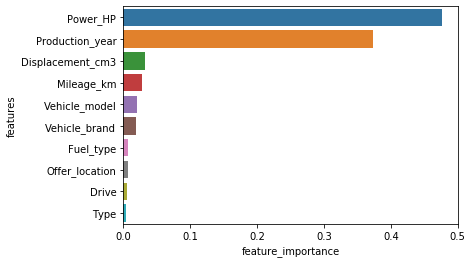

In [162]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [164]:
# Tüm özelliklerimizin etkileri toplamı 1 olmalı
sum(ideal_model.feature_importances_)

1.0